# Pymaceuticals Inc.
---

### Analysis

- Data from 248 mice (nearly 1:1 male to female) was analyzed for a study of changes in tumor size over time with each mouse given one of nine possible treatments or placebo/no treatment.
- Both the mean and median of all tumor volume data per drug regimen are numerically close to each other for all drug regimens and placebo, meaning both/either can be used to paint an accurate picture of the central tendency of the data.
- The best drug treatments (those with the lowest overall mean/median tumor volumes) were Capomulin and Ramicane, while the worst (those most like the placebo/no treatment group) were Ketapril, Naftisol, and Stelasyn. It should be noted however that the total number of observed mouse timepoints for the best drugs was also the two highest total numbers, while the rest had approximately 40 or so fewer total observations. Thus, the data should be further examined to determine whether sampling bias has led to these "good" outcomes for Capomulin and Ramicane. 
- Box plots of final tumor volumes for treatment with Capomulin, Ramicane, Infubinol, and Ceftamin again suggest that Capomulin and Ramicane performed the best among these four, but again, the data should be more closely examined to ensure no bias due to sampling.
- The line plot of tumor volume over time for a specific mouse treated with Capomulin shows a decrease in tumor size over the course of the study by about 3.5 mm3. It would be interesting to investigate whether this holds true for other mice under that treatment as well, or to perform some summary statistics on the change in tumor volume from study start to end for this group.
- The scatter plot of average tumor volume by mouse weight for all mice treated with Capomulin shows a positive correlation between the two, with a correlation coefficient of 0.84.
 

In [1]:
# Importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Setting the .csv file paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single DataFrame
mouse_data_complete = pd.merge(study_results,
                               mouse_metadata,
                               how = "left",
                               on = ["Mouse ID", "Mouse ID"])

# Displaying the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
number_of_mice = len(mouse_data_complete["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Assignment note: "Our data should be uniquely identified by Mouse ID and Timepoint"

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicates = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"], False)]
duplicates["Mouse ID"].unique()

# The two sites below were used as references for use of ".duplicated":
# 1. https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
# 2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

array(['g989'], dtype=object)

In [4]:
# Assignment note: "Optional: Get all the data for the duplicate mouse ID."

# Using ".loc" to get all rows for the duplicate mouse data
duplicate_mouse_data_all = mouse_data_complete.loc[
    mouse_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID
trimmed_mouse_data_complete = mouse_data_complete.drop(
    mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989"].index)
trimmed_mouse_data_complete.head()

# The site below was used as a reference for the use of ".drop":
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame
new_number_of_mice = len(trimmed_mouse_data_complete["Mouse ID"].unique())
new_number_of_mice

248

## Summary Statistics

In [7]:
# Assignment prompt: "Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen"

# Using groupby and summary statistical methods to calculate the following
# properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume
grouped_by_regimen = trimmed_mouse_data_complete.groupby(["Drug Regimen"])
tumor_volume = grouped_by_regimen["Tumor Volume (mm3)"]
mean_tumor_volume = grouped_by_regimen["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_by_regimen["Tumor Volume (mm3)"].median()
tumor_volume_var = grouped_by_regimen["Tumor Volume (mm3)"].var()
tumor_volume_std = grouped_by_regimen["Tumor Volume (mm3)"].std()
tumor_volume_sem = grouped_by_regimen["Tumor Volume (mm3)"].sem()

# The following site was a general reference for available calculations and syntax:
# https://pandas.pydata.org/pandas-docs/version/1.5/reference/groupby.html

# Assembling the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                               "Median Tumor Volume": median_tumor_volume,
                               "Tumor Volume Variance": tumor_volume_var,
                               "Tumor Volume Std. Dev.": tumor_volume_std,
                               "Tumor Volume Std. Err.": tumor_volume_sem})
tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

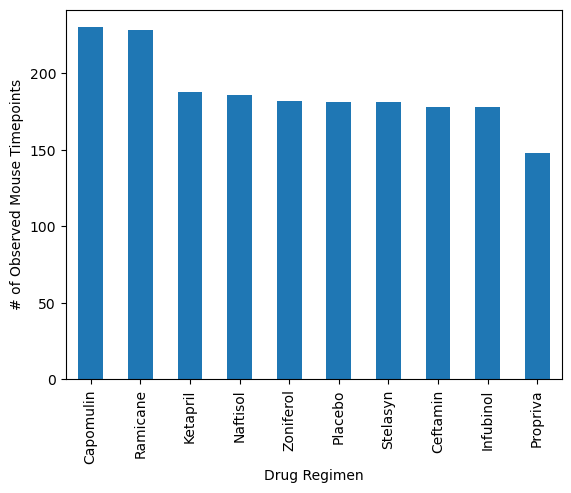

In [8]:
# Assignment prompt: "Generate a bar plot showing the total number of rows
# (Mouse ID/Timepoints) for each drug regimen using Pandas."

# Calculating the number of timepoints per regimen and sorting them in a descending fashion
descending_timepoints_by_regimen = grouped_by_regimen[
    "Timepoint"].size().sort_values(ascending = False)
# Creating a DataFrame of the regimen and timepoints per regimen
regimen_and_timepoints_df = pd.DataFrame({"Timepoints": descending_timepoints_by_regimen})
# Resetting the index of the DataFrame to aid in plotting with Pandas
regimen_and_timepoints_df_index_reset = regimen_and_timepoints_df.reset_index()
# Generating the plot
pandas_bar_plot = regimen_and_timepoints_df_index_reset.plot.bar(
    x = "Drug Regimen",
    y = "Timepoints",
    ylabel = "# of Observed Mouse Timepoints",
    legend = False)

# The site listed below was a general reference for plotting with Pandas here and
# throughout the assignment:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

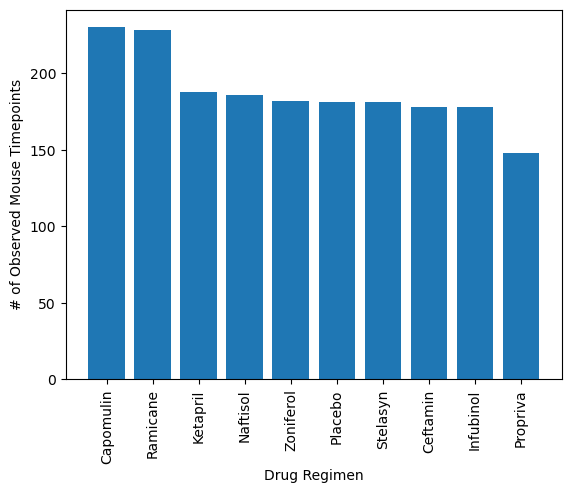

In [9]:
# Assignment prompt: "Generate a bar plot showing the total number of rows
# (Mouse ID/Timepoints) for each drug regimen using pyplot."

# Generating the plot
plt.bar(x = regimen_and_timepoints_df_index_reset["Drug Regimen"],
        height = regimen_and_timepoints_df_index_reset["Timepoints"])
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

# The site listed below was a general reference for plotting with PyPlot here and
# throughout the assignment: 
# https://matplotlib.org/3.5.3/api/pyplot_summary.html

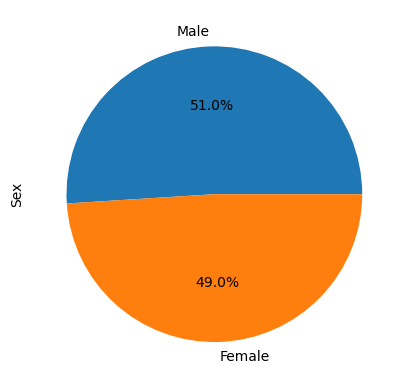

In [10]:
# Assignment prompt: "Generate a pie plot showing the distribution of
# female versus male mice using Pandas"

# Determining the number of female and male mice
grouped_by_sex = trimmed_mouse_data_complete.groupby(["Sex"])
sex_counts_mouse_ID = grouped_by_sex["Mouse ID"].unique()
female_mice_number = len(sex_counts_mouse_ID["Female"])
male_mice_number = len(sex_counts_mouse_ID["Male"])

# The next lines of code were necessary to match the figure to the
# "pymaceuticals_starter.ipynb" file's figure
# The total number of female mice is 123, while the number of males is 125
# The percentage of female mice is actually (rounded to one decimal place) 49.6%
# While the percentage of males is actually (rounded to one decimal place) 50.4%
# But the starter figure has them listed as 49.0% and 51.0%, respectively
# So to match it, I first calculated the actual percentage of males
percent_male = 100 * male_mice_number / (male_mice_number + female_mice_number)
# Then rounded up to the next integer
percent_male_rounded_up = int(percent_male) + ((100 * male_mice_number % (male_mice_number + female_mice_number)) > 0)

# Using the site below for reference:
# https://stackoverflow.com/questions/2356501/how-do-you-round-up-a-number

# Subtracting yields the percentage of female mice for plotting
percent_female = 100 - percent_male_rounded_up

# Creating a DataFrame for plotting with Pandas
sex_IDs = trimmed_mouse_data_complete["Sex"].unique()
mice_numbers_by_sex_df = pd.DataFrame({"Sex": sex_IDs,
                                       "Number of Mice": [percent_female,
                                                          percent_male_rounded_up]})
# Reversing the DataFrame so that the male and female data positions match the given figure
mice_numbers_by_sex_df_reversed = mice_numbers_by_sex_df.iloc[::-1]
mice_numbers_by_sex_df_reversed_reset_index = mice_numbers_by_sex_df_reversed.reset_index(drop = True)

# Using the site below for reference:
# https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe

# Generating the plot
labels = mice_numbers_by_sex_df_reversed_reset_index["Sex"].values
pandas_pie_plot = mice_numbers_by_sex_df_reversed_reset_index.plot.pie(
    autopct="%1.1f%%",
    y = "Number of Mice",
    legend = False,
    ylabel = "Sex",
    labels = labels)

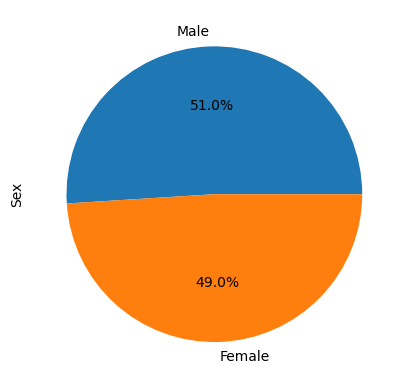

In [11]:
# Generating a pie plot showing the distribution of female versus male mice using PyPlot
plt.pie(x = mice_numbers_by_sex_df_reversed_reset_index["Number of Mice"],
        labels = labels,
        autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Assignment prompt: "Calculate the final tumor volume of each mouse across four of
# the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin"

# Assignment prompt: "Start by getting the last (greatest) timepoint for each mouse"

# Grouping by mouse ID
grouped_by_mouse_ID = trimmed_mouse_data_complete.groupby(["Mouse ID"])

# Using ".max()" to get the last timepoint per mouse
last_timepoint_per_mouse = grouped_by_mouse_ID["Timepoint"].max()

# See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html
# for reference of use of ".max()"

# Assignment prompt: "Merge this group df with the original DataFrame
# to get the tumor volume at the last timepoint"

# Converting the above list to a DataFrame
last_timepoint_per_mouse_df = pd.DataFrame({"Timepoint": last_timepoint_per_mouse})

# Using a left merge to combine this new DataFrame with the original trimmed complete df
merged_df = pd.merge(last_timepoint_per_mouse_df,
                     trimmed_mouse_data_complete, 
                     on = ["Mouse ID", "Timepoint"],
                     how = "left")

In [13]:
# Putting treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Assignment prompt: "Calculate the IQR and quantitatively determine
# if there are any potential outliers.""

# As hinted at above, starting this process with a for loop
for treatment in treatments:
    
    # Locating the rows which contain mice on each drug and getting the tumor volumes
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == treatment]
    tumor_volumes = treatment_df["Tumor Volume (mm3)"]
    
    # Appending the list 
    tumor_volume_data.append(tumor_volumes)
    
    # Determining outliers using upper and lower bounds using another
    # for loop and if statements
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = []
    for tumor_volume in tumor_volumes:
        if (tumor_volume > upper_bound) | (tumor_volume < lower_bound):
            outliers.append(tumor_volume)
    if len(outliers) == 0:
        print(f"{treatment}'s IQR is {iqr} and there are no potential outliers.")
    else:
        print(f"{treatment}'s IQR is {iqr} and the potential outlier(s) is/are: {''.join(str(x) for x in outliers)}.")
        
        # The code line " {''.join(str(x) for x in outliers)} " was adapted from 
        # " print(f"The list is: {' '.join(str(x) for x in list)}") " which was found at
        # https://www.reddit.com/r/learnpython/comments/l10k8h/is_there_a_way_to_unpack_a_list_with_f_stings/

Capomulin's IQR is 7.781863460000004 and there are no potential outliers.
Ramicane's IQR is 9.098536719999998 and there are no potential outliers.
Infubinol's IQR is 11.477135160000003 and the potential outlier(s) is/are: 36.3213458.
Ceftamin's IQR is 15.577752179999997 and there are no potential outliers.


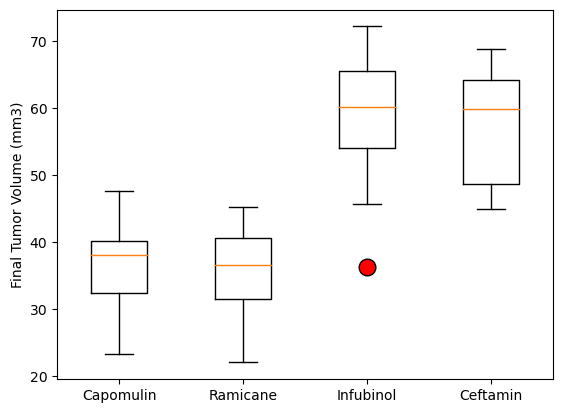

In [14]:
# Generating a box plot that shows the distrubution of the tumor volume
# for each treatment group.
plt.boxplot(x = tumor_volume_data,
            labels = treatments,
            flierprops = {"markerfacecolor": "red", "markersize": 12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()
# The following was referenced for changing outlier formatting:
# https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot

## Line and Scatter Plots

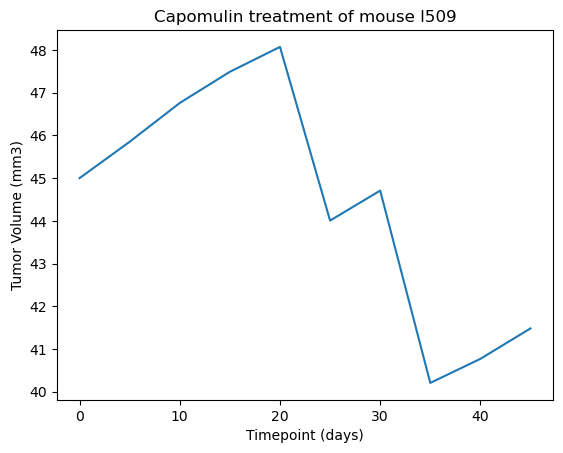

In [15]:
# Assignment prompt: "Generate a line plot of tumor volume vs.
# time point for a single mouse treated with Capomulin"

# Setting the mouse as "i509" based on the provided output
mouse = "l509"

# Using ".loc" to get all data for mouse i509
mouse_data_l509 = trimmed_mouse_data_complete.loc[
    trimmed_mouse_data_complete["Mouse ID"] == mouse]

# Generating the line plot using Pandas
l509_plot = mouse_data_l509.plot.line(x = "Timepoint",
                                      y = "Tumor Volume (mm3)",
                                      title = "Capomulin treatment of mouse l509",
                                      xlabel = "Timepoint (days)",
                                      ylabel = "Tumor Volume (mm3)",
                                      legend = False)

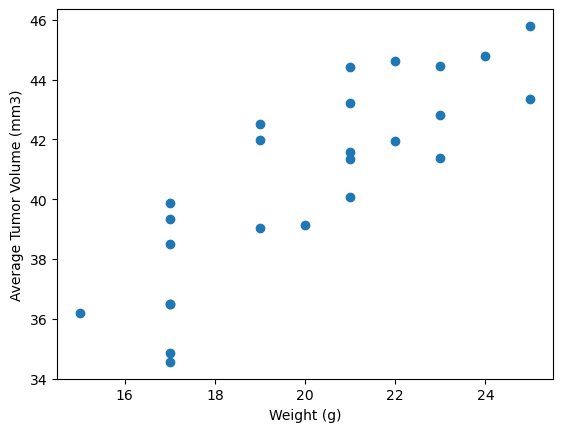

In [16]:
# Assignment prompt: "Generate a scatter plot of mouse weight vs.
# the average observed tumor volume for the entire Capomulin regimen"

# Setting the drug and using ".loc" to get all of its data
drug = "Capomulin"
drug_data = trimmed_mouse_data_complete.loc[
    trimmed_mouse_data_complete["Drug Regimen"] == drug]

# Calculating the average tumor volume based on mouse ID and weight
avg_volume_df = drug_data.groupby(["Mouse ID", "Weight (g)"]).mean("Tumor Volume (mm3)")

# Resetting the index for ease of plotting
avg_volume_df_reset_index = avg_volume_df.reset_index()

# Generating the plot
x_values = avg_volume_df_reset_index["Weight (g)"]
y_values = avg_volume_df_reset_index["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


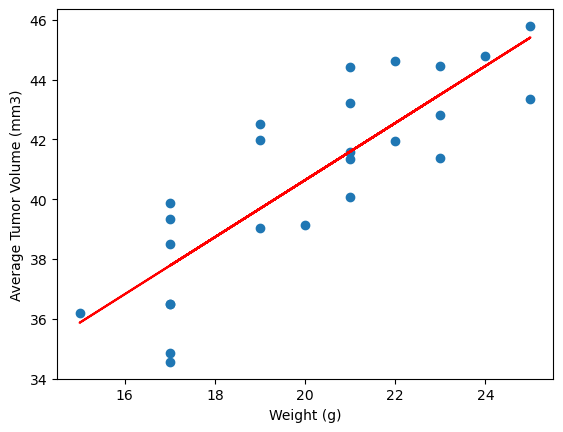

In [17]:
# Assignment prompt: "Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen"

# Calculating and printing the value of the correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculating the liner regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Generating the plot
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()